<a href="https://colab.research.google.com/github/Jin-Yuseung/Machine_Learning_Study/blob/main/11%EC%9B%94_10%EC%9D%BC_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SGDClassifier

#새로운 데이터에 대해서만 조금씩 더 훈련 : 점진적 학습(확률적 경사하강법)

In [ ]:
#확률적 경사하강법은 전체 샘플을 사용하는 것이 아닌 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는다.
#-> 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것 : 에포크 

In [41]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [42]:
fish.head()
#Species 열 제외하고 사용 -> Species는 target 데이터임

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [43]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [44]:
fish_input[:5]
#numpy는 head기능이 제공되지 않음

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [45]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [46]:
#표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [47]:
from sklearn.linear_model import SGDClassifier

In [15]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
#loss-> 손실함수의 종류=로지스틱 / max_iter->수행할 에포크 횟수
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#훈련세트와 테스트 세트 정확도가 낮아 에포크를 늘려야함

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [16]:
#확률적 경사 하강법은 점진적 학습이 가능하여 다시 처음부터 하는 게 아니라 추가로 이어서 훈련시킬 수 있음
#이때 매서드는 partial_fit() -> 호출할 때마다 1에포크씩 이어서 훈련 가능
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [17]:
#score가 향상되었으나 아직 부족 -> 하지만 무작정 많이 반복할 수는 없음 -> 기준 필요


#에포크와 과대/과소적합

In [18]:
#에포크의 횟수 -> 과대적합과 과소적합을 결정
#적은 에포크 -> 학습이 덜 되어 과소적합 / 많은 에포크 -> 훈련세트에 너무 잘맞음 -> 과대적합

In [19]:
#훈련세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 점수는 어느 지점부터 감소 = 과대적합 발생 지점
#=> 조기종료를 해야함

In [20]:
#partial_fit() 매서드만 사용하기 때문에 훈련세트에 있는 전체 클래스의 레이블을 parital_fit() 매서드에 전달해주어야함
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target)

In [22]:
classes
#np.unique함수를 통해 train_target에 있는 생선들 불러와줌

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [24]:
#300번의 에포크 반복 진행
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

#train_score.append를 통해 train_score에 훈련세트 점수를 넣어줌

In [32]:
print(np.round(train_score[:5],5))
#값이 들어간 것을 확인할 수 있음
#보기 편하게 값을 소수점 5자리에서 반올림시킴

[0.52941 0.62185 0.63866 0.73109 0.72269]


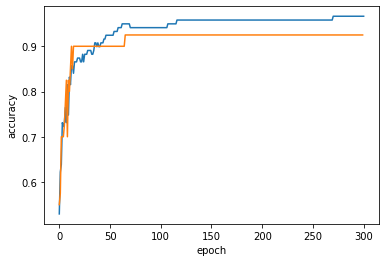

In [34]:
#그래프로 표현
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
#데이터가 많지않아 잘 드러나지는 않지만 백번째 에포크 이후로 훈련세트와 테스트 세트 점수가 벌어지는 것을 확인 & 초기는 과소적합 -> 100번째가 적절

In [52]:
#그래서 에포크를 100으로 설정해서 다시 훈련 진행
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
#SGDClassifier는 일정 에포크 동안 값이 향상이 되지 않으면 자동으로 훈련을 멈추는데 이때 tol=None을 설정해주면 무조건 max_iter로 지정해준 횟수만큼 에포크 진행시킴

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [53]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [54]:
#SGDClassifier함수의 loss 매개변수의 디폴트 값은 'hinge'로 서포트 벡터머신을 위한 손실함수
#SGDClassifier함수는 여러 종류의 손실함수를 loss 매개변수에 지정해 다양한 머신러닝 알고리즘을 지원

In [56]:
#힌지 손실을 위한 예제
sc = SGDClassifier(max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(max_iter=100, random_state=42, tol=None)

In [57]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
